In [ ]:
# pip install prophet
# pip install statsmodels
# pip install pmdarima
# pip install plotly -> prophet import edildikten sonra plot uyarısı verirse plotly yüklenmeli. Yüklü ise güncellenmeli

In [5]:
import pandas as pd
from prophet import Prophet
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings

## Dataset

In [6]:
data = pd.read_csv('monthly-beer-production-in-austr.csv')

In [7]:
data.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [8]:
data.tail()

,Month,Monthly beer production
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0
475,1995-08,153.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [10]:
# Month -> datetime
data.Month = pd.to_datetime(data.Month)
data = data.set_index("Month")

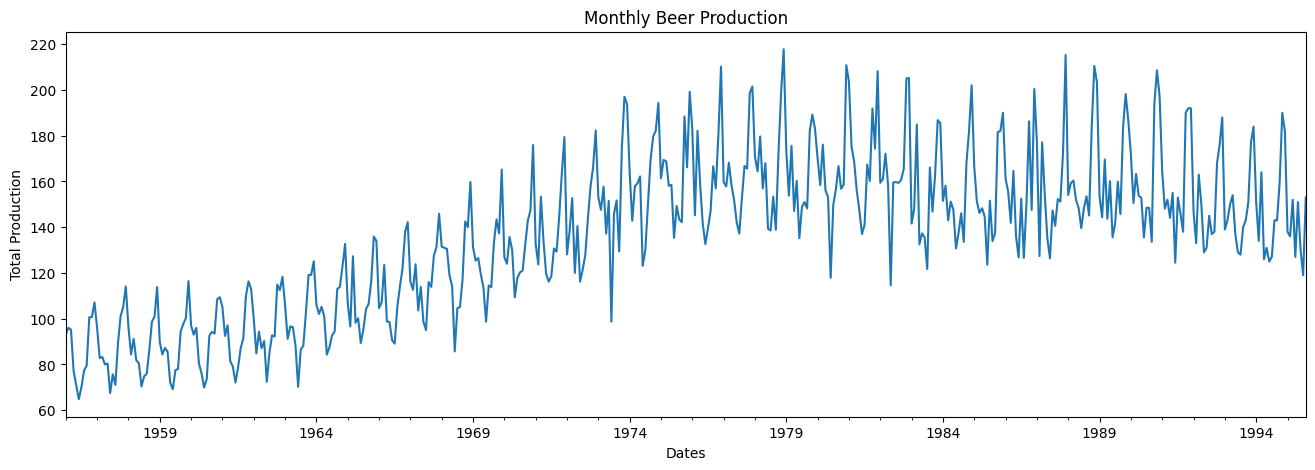

In [11]:
ax = data['Monthly beer production'].plot(figsize = (16,5), title = "Monthly Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production');

In [14]:
print(data.index.freq) # tutarlı bir frekans yok gözüküyor.

None


In [17]:
# frekansı Ay başı olarak belirtmek için ;

data.index.freq = 'MS'

# ay sonu olarak belirtmek isteseydim ;

# data.index.freq = 'M'

# Resample gibi zaman serisi işlemlerini yapabilmek için frekansı belirtmek gerekiyor.

In [18]:
print(data.index.freq) 

<MonthBegin>


In [19]:
start_date = '1956-01'
end_date = '1956-12'
split = data.loc[start_date:end_date]
split

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
1956-06-01,64.8
1956-07-01,70.1
1956-08-01,77.3
1956-09-01,79.5


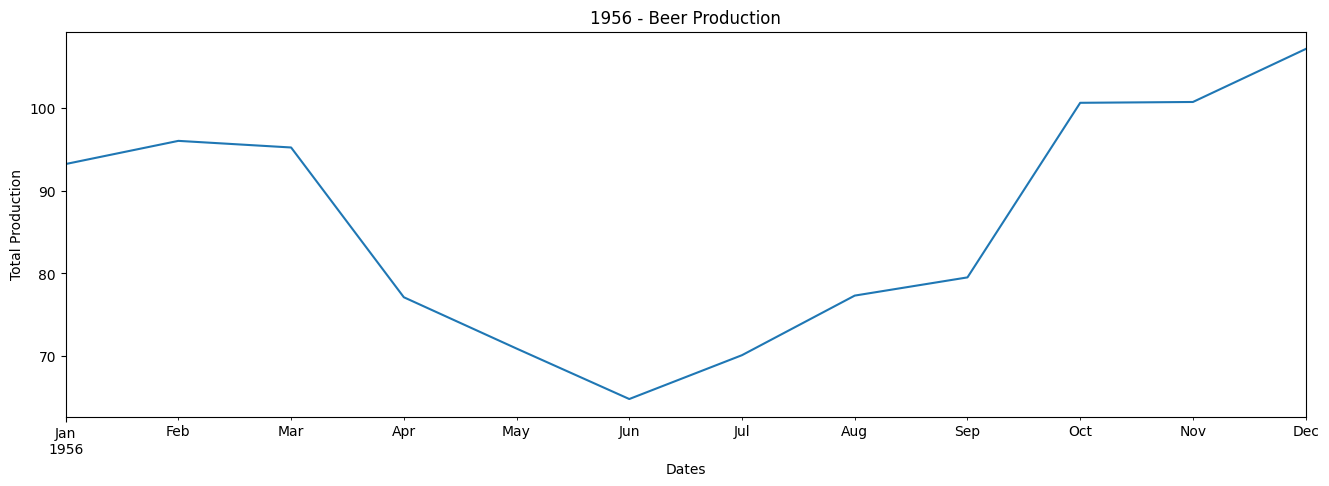

In [20]:
ax = split['Monthly beer production'].plot(figsize = (16,5), title = "1956 - Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production');

In [21]:
start_date = '1957-01'
end_date = '1957-12'
split = data.loc[start_date:end_date]
split

,Monthly beer production
Month,
1957-01-01,95.9
1957-02-01,82.8
1957-03-01,83.3
1957-04-01,80.0
1957-05-01,80.4
1957-06-01,67.5
1957-07-01,75.7
1957-08-01,71.1
1957-09-01,89.3


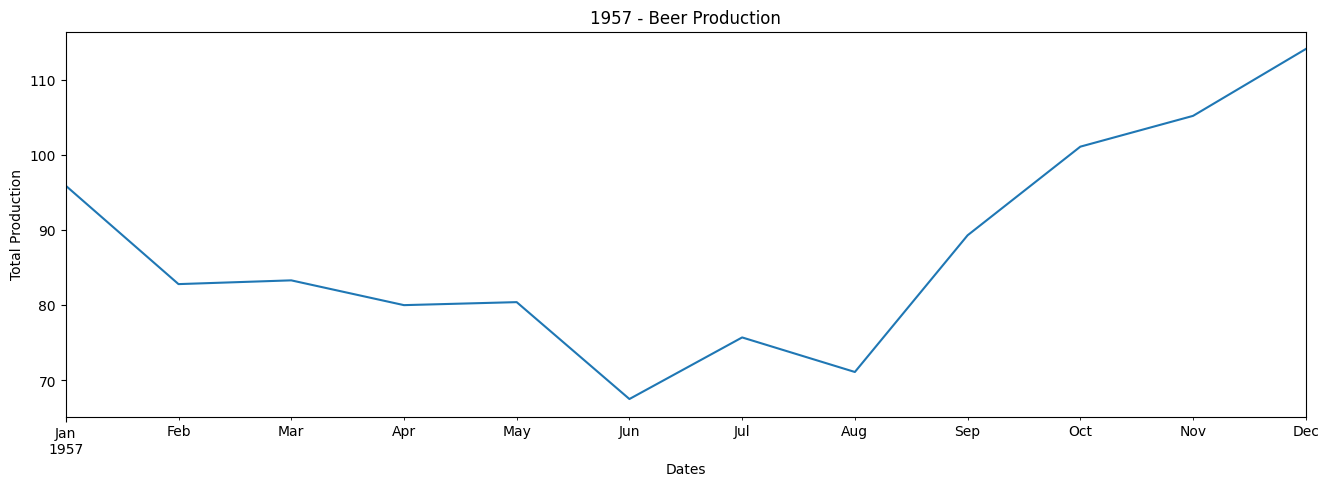

In [22]:
ax = split['Monthly beer production'].plot(figsize = (16,5), title = "1957 - Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production');

In [23]:
start_date = '1956-01'
end_date = '1957-12'
split = data.loc[start_date:end_date]
split

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
1956-06-01,64.8
1956-07-01,70.1
1956-08-01,77.3
1956-09-01,79.5


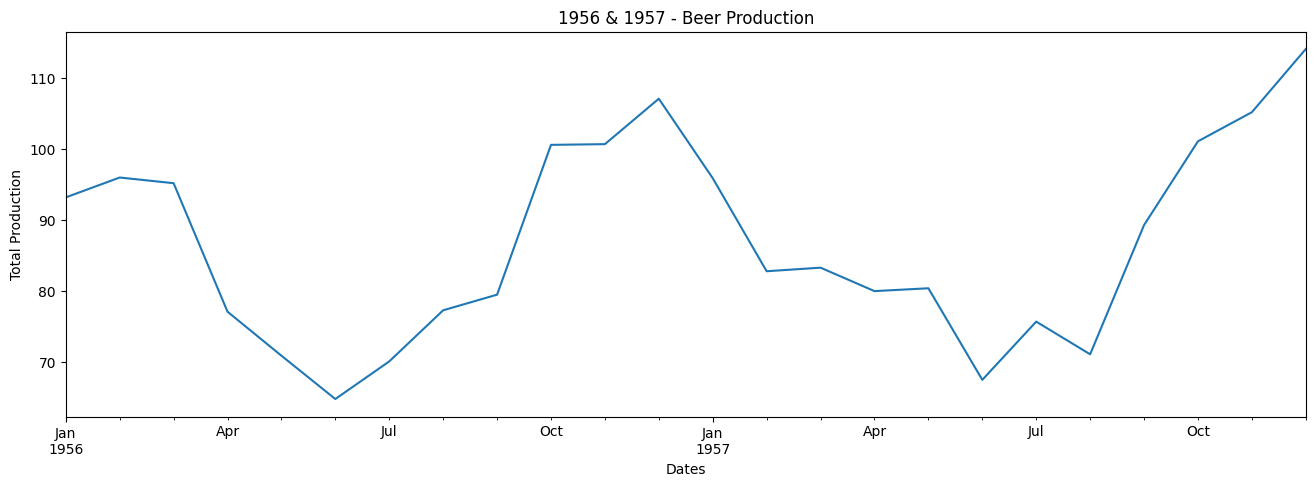

In [24]:
ax = split['Monthly beer production'].plot(figsize = (16,5), title = "1956 & 1957 - Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production');

# mevsimsellik gözüküyor.

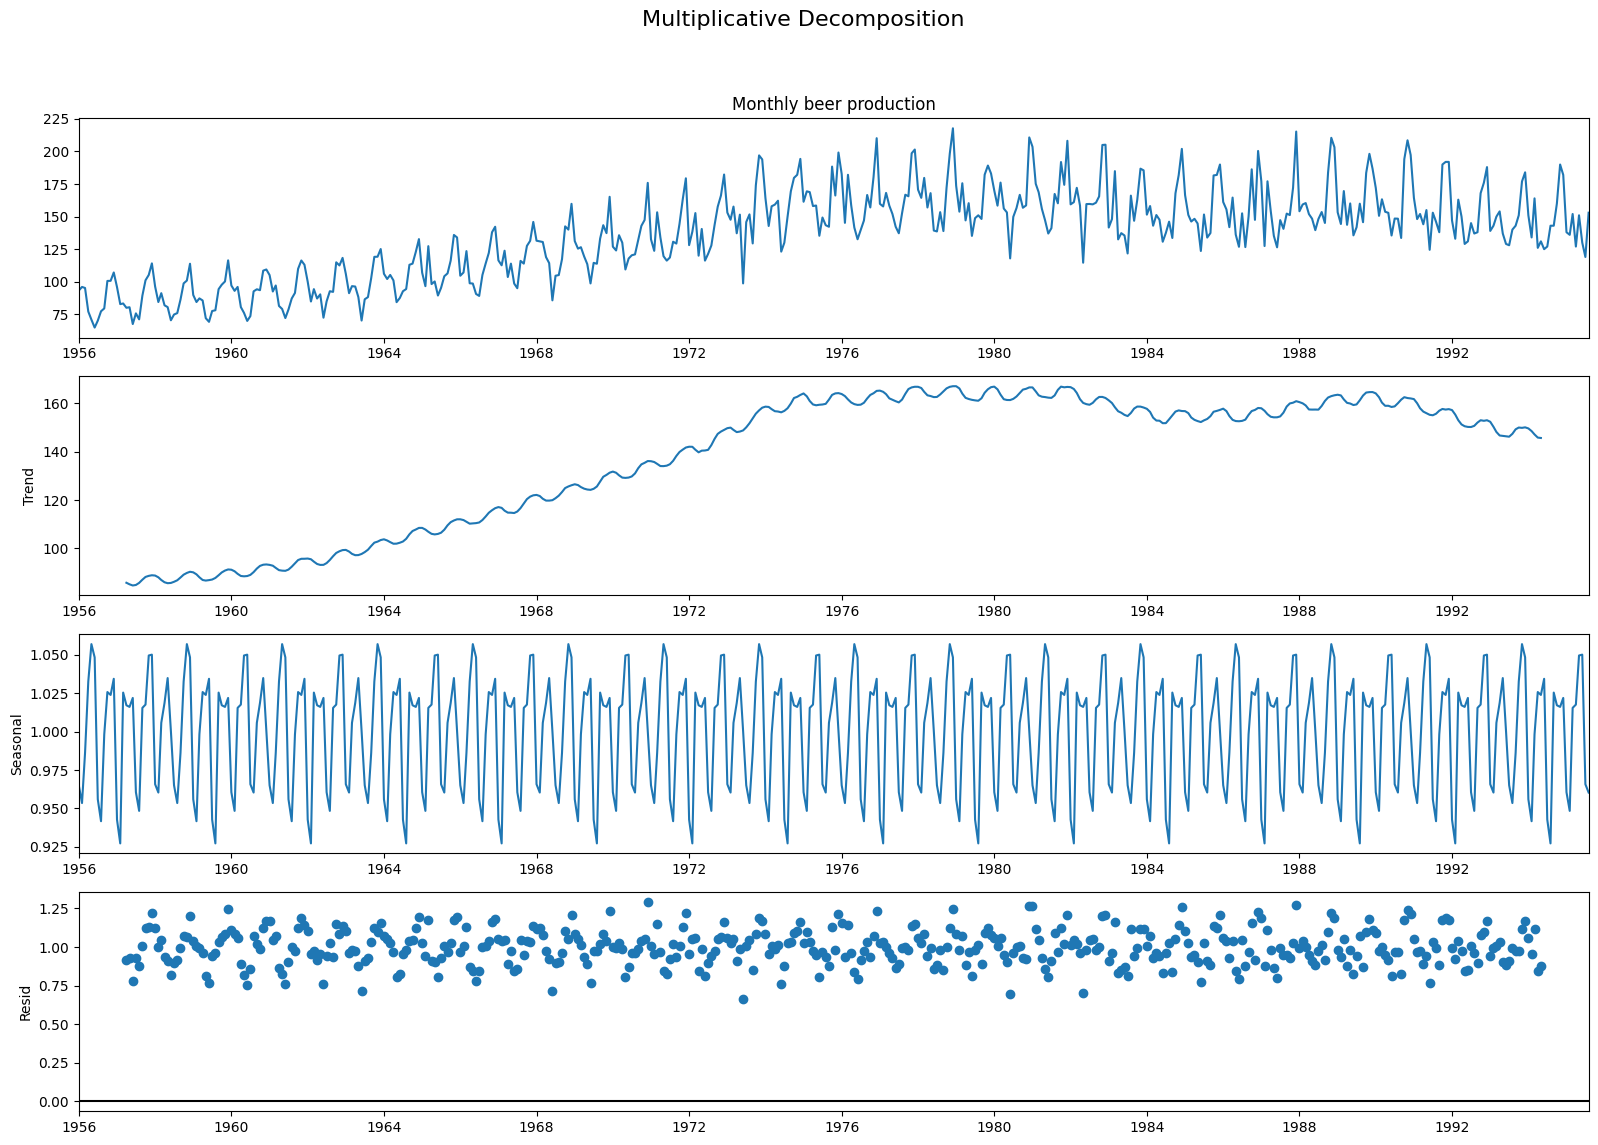

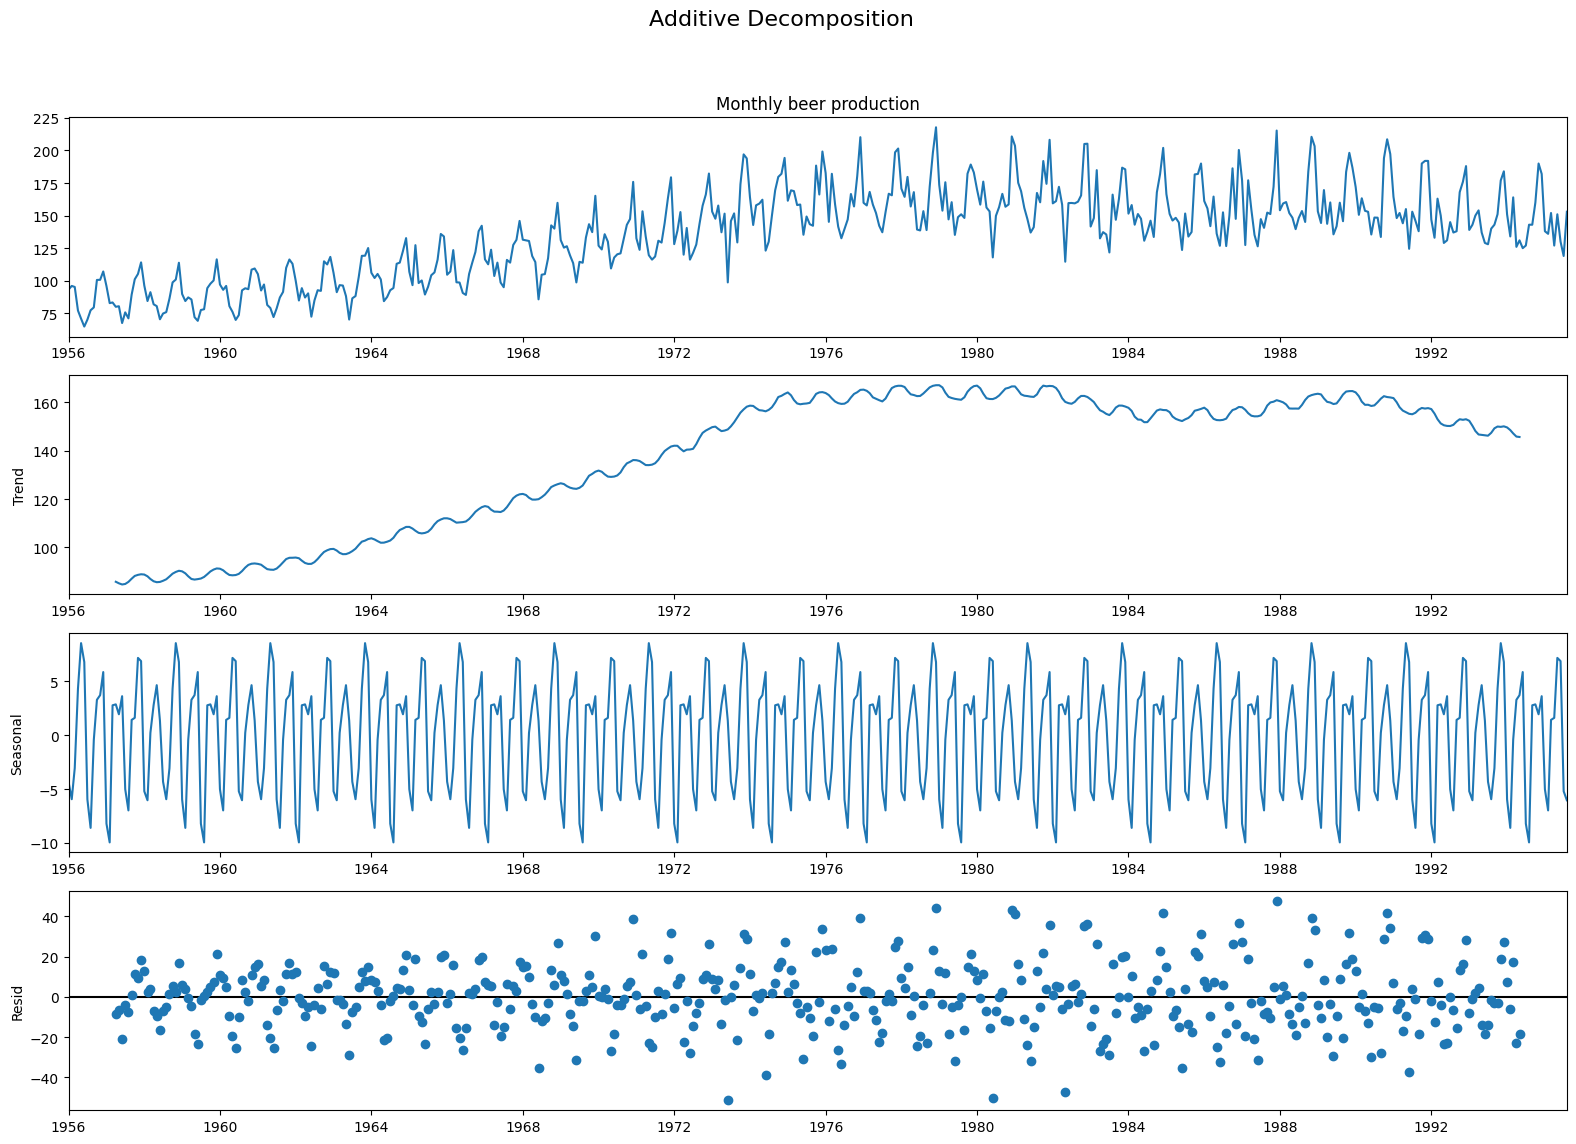

In [26]:
# Ayrıştırarak bakmak
# Seasonal decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(data['Monthly beer production'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(data['Monthly beer production'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Otokorelasyon, basitçe bir serinin kendi gecikmeleri ile korelasyonudur. 
Bir seri önemli ölçüde otokorelasyonlu ise, bu, serinin önceki değerlerinin (gecikmeler) mevcut değeri tahmin etmede yardımcı olabileceği anlamına gelir. 
Kısmi Otokorelasyon da benzer bilgileri iletir, ancak bir serinin saf korelasyonunu ve gecikmesini aktarır, ara gecikmelerden gelen korelasyon katkılarını hariç tutar.

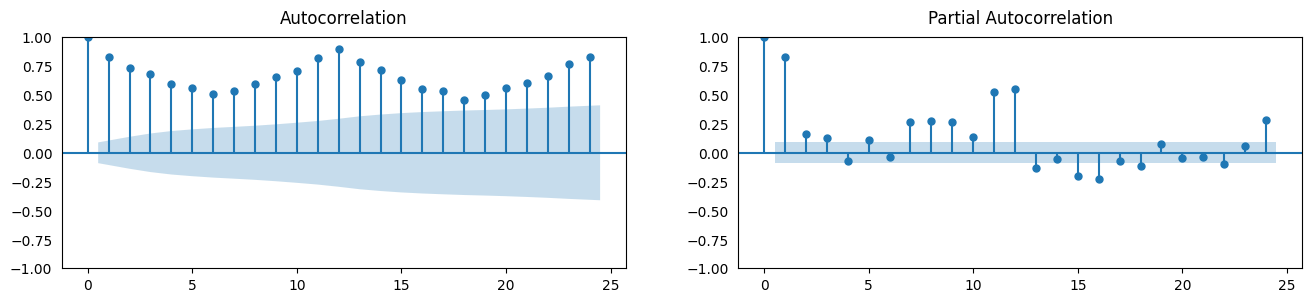

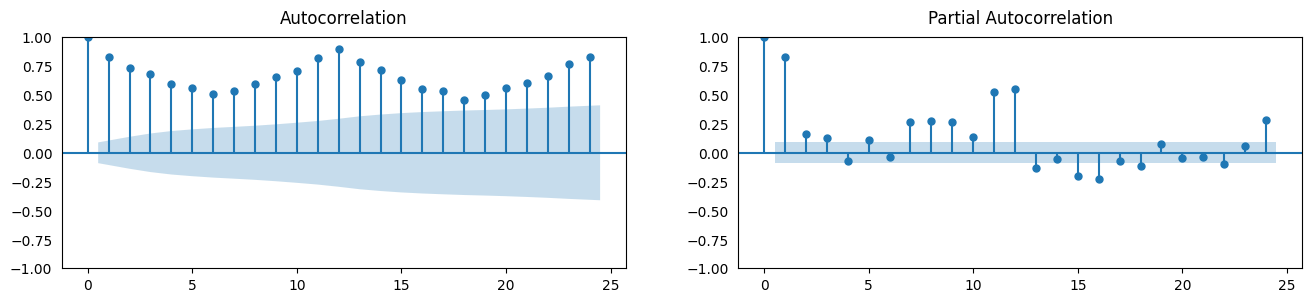

In [46]:
# AutoCorrelation ile testini gerçekleştirelim
from statsmodels.tsa.stattools import acf, pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data['Monthly beer production'].tolist(), lags=24, ax=axes[0])
plot_pacf(data['Monthly beer production'].tolist(), lags=24, ax=axes[1])

# 6.ay ve 18.ay mevsimselliğe örnek olabilir
# 12.ay ve 24.ay

Gecikme grafiği, bir zaman serisinin kendi gecikmesine karşı dağılım grafiğidir. 
Normalde otokorelasyon olup olmadığını kontrol etmek için kullanılır. 
Seride herhangi bir örüntü varsa, seri otokorelasyonludur. Böyle bir örüntü yoksa, serinin rastgele beyaz gürültü olması muhtemeldir.

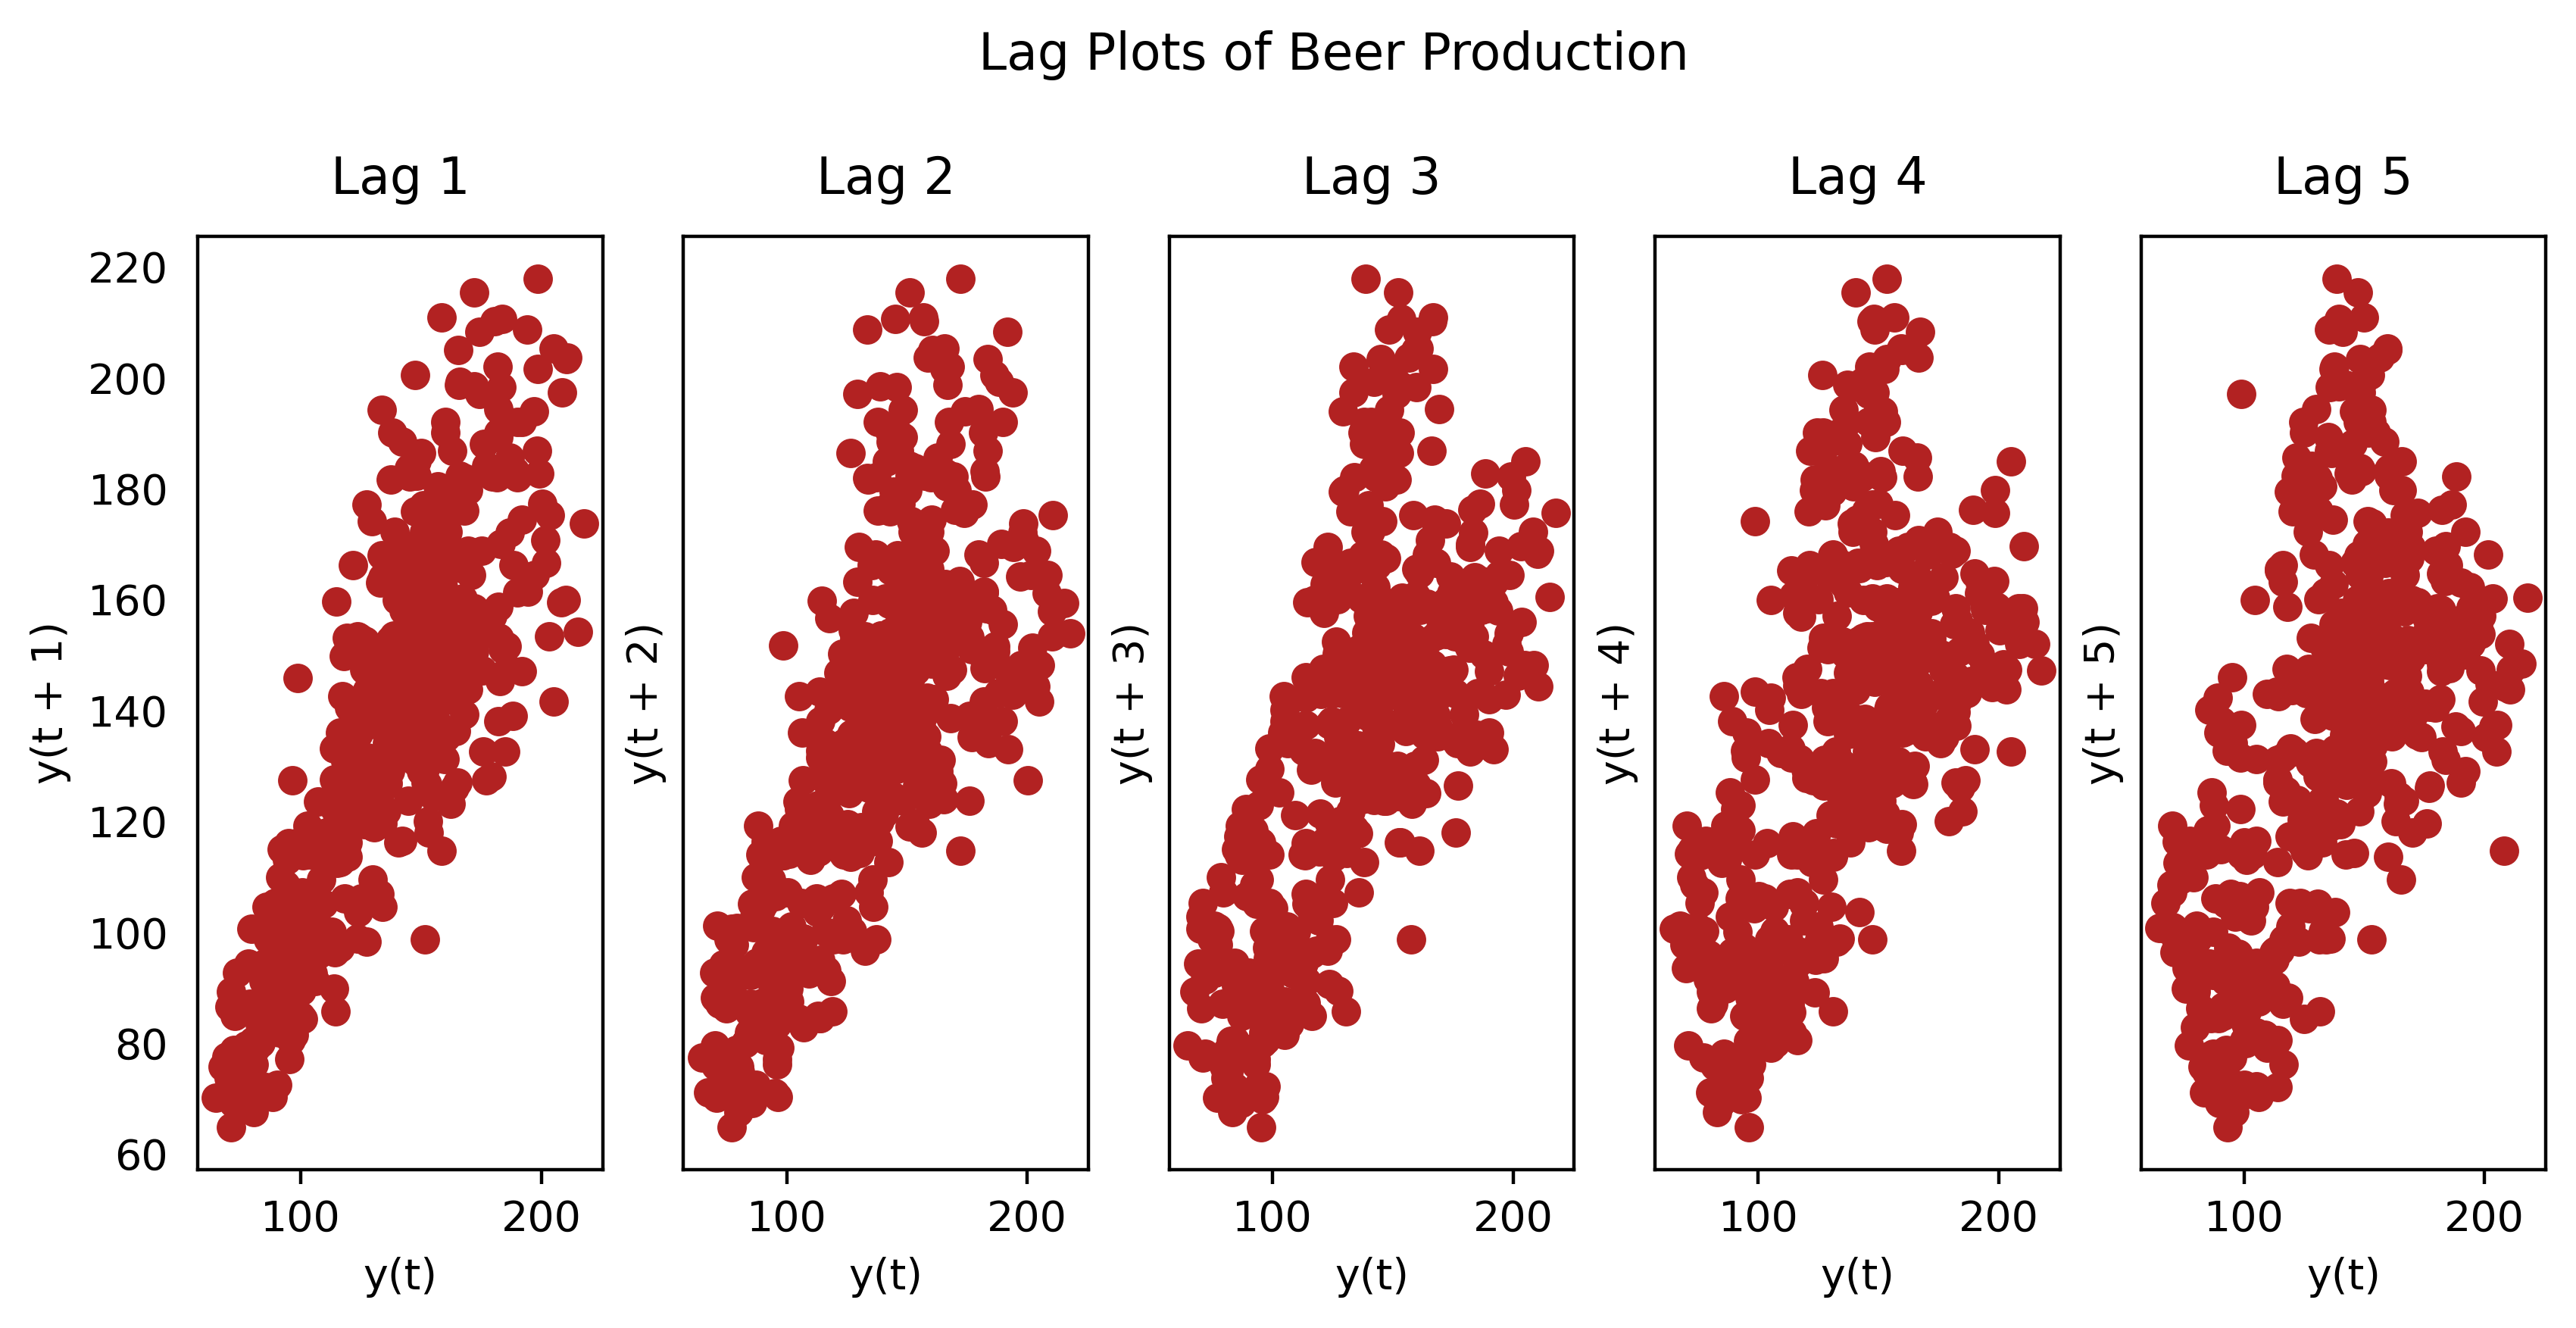

In [45]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 5, figsize=(10,4), sharex=True, sharey=True, dpi=400)
for i, ax in enumerate(axes.flatten()[:5]):
    lag_plot(data['Monthly beer production'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Beer Production', y=1.05)    
plt.show()

# Mevsimsellikten dolayı ARIMA yerine SARIMA tercih edilebilir

In [49]:
# Auto Arıma ile en iyi parametre değerlerini bulabiliriz.
auto_arima(data['Monthly beer production'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  476
Model:             SARIMAX(5, 1, 4)x(1, 0, [1], 12)   Log Likelihood               -1723.933
Date:                              Tue, 27 Dec 2022   AIC                           3471.866
Time:                                      23:54:39   BIC                           3521.825
Sample:                                  01-01-1956   HQIC                          3491.512
                                       - 08-01-1995                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2224      0.053     -4.189      0.000      -0.326      -0.118
ar.L2         -0.1071      0.058     -1.862      0.063      -0.220       0.006
ar.L3          0.7271      0.055     13.237      0.000       0.619       0.835
ar.L4         -0.1603      0.048     -3.327      0.001      -0.255      -0.066
ar.L5          0.0158      0.048      0.330      0.742      -0.078       0.110
ma.L1         -0.7449      0.033    -22.427      0.000      -0.810      -0.680
ma.L2         -0.1699      0.024     -7.051      0.000      -0.217      -0.123
ma.L3         -0.7994      0.023    -34.899      0.000      -0.844      -0.755
ma.L4          0.8629      0.030     29.203      0.000       0.805       0.921
ar.S.L12       0.9948      0.004    229.554      0.000       0.986       1.003
ma.S.L12      -0.8191      0.036    -22.468      0.000      -0.891      -0.748
sigma2        77.6984      4.151     18.717      0.000      69.562      85.835
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                70.02
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               2.94   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Mevsimsel ARIMA, mevsimsel bir bileşenle tek değişkenli zaman serisi verilerini açıkça destekleyen bir ARIMA uzantısıdır. Serinin mevsimsel bileşeni için otoregresyon (AR), fark (I) ve hareketli ortalamayı (MA) belirtmek için üç yeni hiper parametre ve ayrıca mevsimsellik dönemi için ek bir parametre ekler.

ARIMA'nın parçası olmayan ve yapılandırılması gereken dört mevsimsel öğe vardır; bunlar:
P: Mevsimsel otoregresif düzen.
D: Mevsim farkı sıralaması.
S: Mevsimsel hareketli ortalama düzeni.
m: Tek bir mevsimsel dönem için zaman adımı sayısı

In [50]:
# train - test split

# son 12 ay tahmin  - test

train = data[:len(data)-12]
test = data[len(data)-12:]

In [51]:
test

,Monthly beer production
Month,
1994-09-01,143.0
1994-10-01,160.0
1994-11-01,190.0
1994-12-01,182.0
1995-01-01,138.0
1995-02-01,136.0
1995-03-01,152.0
1995-04-01,127.0
1995-05-01,151.0


In [53]:
# MODEL

arima = SARIMAX(train['Monthly beer production'], order = (5,1,4), seasonal_order = (1,0,1,12))
arima_result = arima.fit()
arima_result.summary()

C:\Users\sevke\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sevke\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sevke\anaconda3\envs\timeseries\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Monthly beer production   No. Observations:                  464
Model:             SARIMAX(5, 1, 4)x(1, 0, [1], 12)   Log Likelihood               -1680.873
Date:                              Wed, 28 Dec 2022   AIC                           3385.747
Time:                                      00:02:11   BIC                           3435.399
Sample:                                  01-01-1956   HQIC                          3405.294
                                       - 08-01-1994                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2902      0.066     -4.410      0.000      -0.419      -0.161
ar.L2         -0.1559      0.073     -2.137      0.033      -0.299      -0.013
ar.L3          0.6642      0.077      8.586      0.000       0.513       0.816
ar.L4         -0.1684      0.050     -3.347      0.001      -0.267      -0.070
ar.L5         -0.0131      0.052     -0.254      0.800      -0.114       0.088
ma.L1         -0.6855      0.053    -12.940      0.000      -0.789      -0.582
ma.L2         -0.1701      0.031     -5.452      0.000      -0.231      -0.109
ma.L3         -0.7832      0.029    -26.775      0.000      -0.841      -0.726
ma.L4          0.8025      0.046     17.619      0.000       0.713       0.892
ar.S.L12       0.9957      0.004    274.582      0.000       0.989       1.003
ma.S.L12      -0.8293      0.034    -24.727      0.000      -0.895      -0.764
sigma2        75.0713      3.905     19.225      0.000      67.418      82.725
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                70.29
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               3.68   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
len(train)

464

In [55]:
len(data)-1

475

In [56]:
arima_prediction = arima_result.predict(start = len(train), end = len(data)-1, typ="levels").rename("SARIMA Predictions")

In [57]:
arima_prediction

1994-09-01    134.943789
1994-10-01    156.937777
1994-11-01    178.643562
1994-12-01    181.548452
1995-01-01    140.707429
1995-02-01    139.402608
1995-03-01    147.740310
1995-04-01    132.785899
1995-05-01    136.671865
1995-06-01    116.757389
1995-07-01    128.151655
1995-08-01    139.759134
Freq: MS, Name: SARIMA Predictions, dtype: float64

<AxesSubplot: xlabel='Month'>

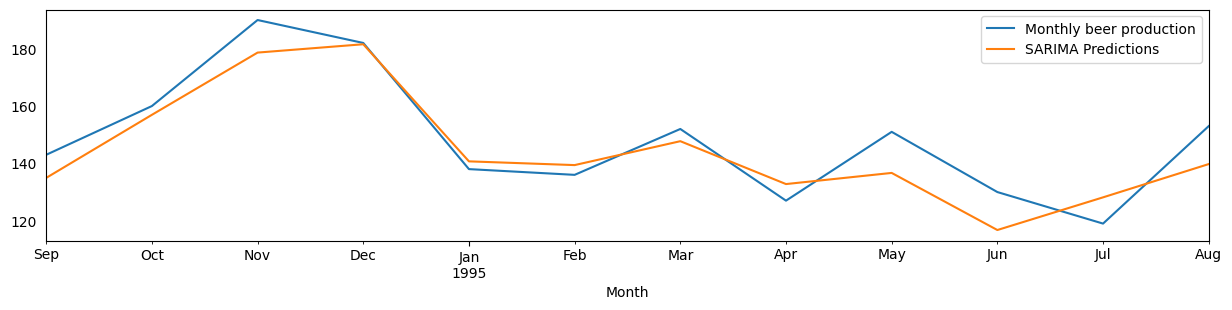

In [60]:
test["Monthly beer production"].plot(figsize = (15,3), legend = True)

arima_prediction.plot(legend = True)

In [62]:
sarima_rmse_error = rmse(test['Monthly beer production'], arima_prediction)
sarima_mse_error = sarima_rmse_error**2
mean_value = data['Monthly beer production'].mean()

print(f'MSE Error: {sarima_mse_error}\nRMSE Error: {sarima_rmse_error}\nMean: {mean_value}')

MSE Error: 76.14311021665736
RMSE Error: 8.726001960615031
Mean: 136.3953781512605


In [69]:
# Son bölümde karşılaştırma için ;

predictions = test.copy()
predictions['SARIMA_PRED'] = arima_prediction

In [71]:
predictions

,Monthly beer production,SARIMA_PRED
Month,,
1994-09-01,143.0,134.943789
1994-10-01,160.0,156.937777
1994-11-01,190.0,178.643562
1994-12-01,182.0,181.548452
1995-01-01,138.0,140.707429
1995-02-01,136.0,139.402608
1995-03-01,152.0,147.740310
1995-04-01,127.0,132.785899
1995-05-01,151.0,136.671865


# LSTM

In [72]:
test

,Monthly beer production
Month,
1994-09-01,143.0
1994-10-01,160.0
1994-11-01,190.0
1994-12-01,182.0
1995-01-01,138.0
1995-02-01,136.0
1995-03-01,152.0
1995-04-01,127.0
1995-05-01,151.0


In [73]:
# Min - Max Scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train) # sadece eğitim verisi fit edilir. 

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

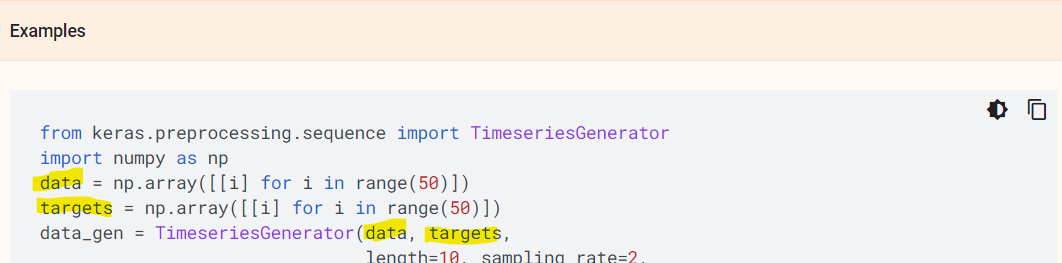

In [78]:
# LSTM Modelinden önce 12 adım geriye bakabilmek için generator ayarlamamız gerekiyor.

from keras.preprocessing.sequence import TimeseriesGenerator # pip install keras  & pip install tensorflow

n_input = 12 # 12 adım geriye
n_features= 1 # bir özelliğimiz var
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [83]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm = Sequential()
lstm.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
lstm.add(Dense(1))
lstm.compile(optimizer='adam', loss='mse')

lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 150)               91200     
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [85]:
from keras.callbacks import ModelCheckpoint, TensorBoard
cp = ModelCheckpoint(filepath="lstm.h5",
                               save_best_only=True,monitor = "loss",
                               verbose=0)

In [86]:
history = lstm.fit(generator, epochs = 30,callbacks = cp)

Epoch 1/30
452/452 [==============================] - 2s 3ms/step - loss: 0.0243
Epoch 2/30
452/452 [==============================] - 1s 3ms/step - loss: 0.0159
Epoch 3/30
452/452 [==============================] - 2s 5ms/step - loss: 0.0093
Epoch 4/30
452/452 [==============================] - 3s 6ms/step - loss: 0.0090
Epoch 5/30
452/452 [==============================] - 3s 6ms/step - loss: 0.0080
Epoch 6/30
452/452 [==============================] - 3s 6ms/step - loss: 0.0076
Epoch 7/30
452/452 [==============================] - 3s 6ms/step - loss: 0.0073
Epoch 8/30
452/452 [==============================] - 2s 5ms/step - loss: 0.0072
Epoch 9/30
452/452 [==============================] - 3s 6ms/step - loss: 0.0070
Epoch 10/30
452/452 [==============================] - 3s 5ms/step - loss: 0.0075
Epoch 11/30
452/452 [==============================] - 2s 4ms/step - loss: 0.0066
Epoch 12/30
452/452 [==============================] - 2s 4ms/step - loss: 0.0066
Epoch 13/30
452/452 [====

Text(0.5, 1.0, 'LSTM - Training Loss')

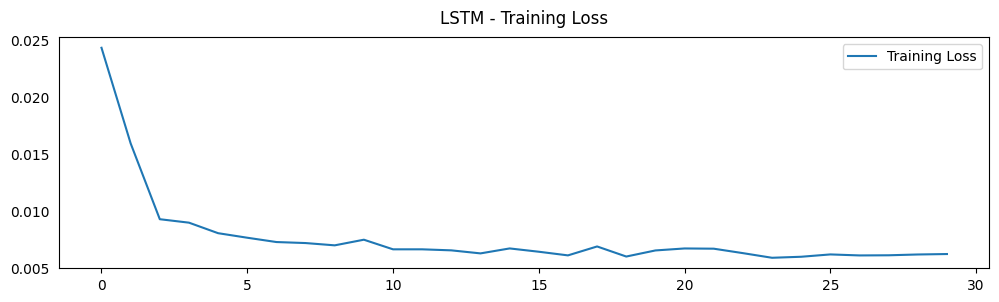

In [89]:
loss = history.history['loss']


epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(12, 3))
plt.subplot(1, 1, 1)

plt.plot(epochs_range, loss, label='Training Loss')

plt.legend(loc='upper right')
plt.title('LSTM - Training Loss')

In [91]:
# best model
from keras.models import load_model
lstm_model = load_model('lstm.h5')

In [93]:
lstm_predictions_scaled = list()

batch = scaled_train[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 29ms/step


In [94]:
lstm_predictions_scaled

[array([0.48445767], dtype=float32),
 array([0.56555545], dtype=float32),
 array([0.6811208], dtype=float32),
 array([0.68217784], dtype=float32),
 array([0.51275814], dtype=float32),
 array([0.4874602], dtype=float32),
 array([0.54866487], dtype=float32),
 array([0.4053909], dtype=float32),
 array([0.40852055], dtype=float32),
 array([0.38764057], dtype=float32),
 array([0.40947375], dtype=float32),
 array([0.45715797], dtype=float32)]

In [96]:
# inverse

lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[138.92202376],
       [151.32998435],
       [169.01148437],
       [169.17320977],
       [143.25199478],
       [139.38140999],
       [148.74572479],
       [126.82480593],
       [127.30364408],
       [124.10900654],
       [127.44948329],
       [134.74516933]])

In [98]:
predictions

,Monthly beer production,SARIMA_PRED
Month,,
1994-09-01,143.0,134.943789
1994-10-01,160.0,156.937777
1994-11-01,190.0,178.643562
1994-12-01,182.0,181.548452
1995-01-01,138.0,140.707429
1995-02-01,136.0,139.402608
1995-03-01,152.0,147.740310
1995-04-01,127.0,132.785899
1995-05-01,151.0,136.671865


In [99]:
predictions["LSTM_PRED"] = lstm_predictions
predictions

,Monthly beer production,SARIMA_PRED,LSTM_PRED
Month,,,
1994-09-01,143.0,134.943789,138.922024
1994-10-01,160.0,156.937777,151.329984
1994-11-01,190.0,178.643562,169.011484
1994-12-01,182.0,181.548452,169.173210
1995-01-01,138.0,140.707429,143.251995
1995-02-01,136.0,139.402608,139.381410
1995-03-01,152.0,147.740310,148.745725
1995-04-01,127.0,132.785899,126.824806
1995-05-01,151.0,136.671865,127.303644


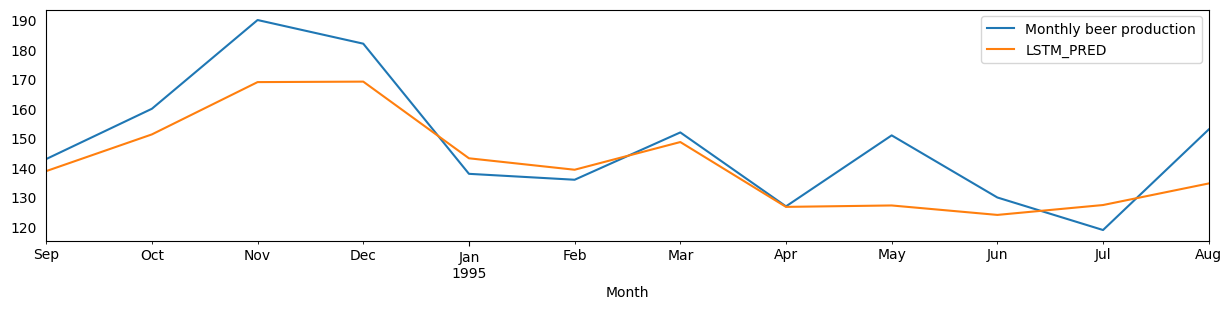

In [101]:
test['Monthly beer production'].plot(figsize = (15,3), legend=True)
predictions['LSTM_PRED'].plot(legend = True);

In [102]:
lstm_rmse_error = rmse(test['Monthly beer production'], predictions["LSTM_PRED"])
lstm_mse_error = lstm_rmse_error**2
mean_value = data['Monthly beer production'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 145.61128988324324
RMSE Error: 12.066950314111816
Mean: 136.3953781512605


# Prophet

Hedef değişken ismi --> y
date ismi --> ds olmak zorunda

In [104]:
df = data.copy()
df = data.reset_index() # Month değişkenini indexten çıkardık.

df.columns = ['ds','y'] # prophet kullanımı için

train_df = df.iloc[:len(data)-12]
test_df = df.iloc[len(data)-12:]

test_df

,ds,y
464,1994-09-01,143.0
465,1994-10-01,160.0
466,1994-11-01,190.0
467,1994-12-01,182.0
468,1995-01-01,138.0
469,1995-02-01,136.0
470,1995-03-01,152.0
471,1995-04-01,127.0
472,1995-05-01,151.0
473,1995-06-01,130.0


In [106]:
from prophet import Prophet

m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)
prophet_pred.tail()

00:41:31 - cmdstanpy - INFO - Chain [1] start processing
00:41:36 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
471,1995-04-01,151.040140,131.496519,155.567214,150.987012,151.094225,-7.934859,-7.934859,-7.934859,-7.934859,-7.934859,-7.934859,0.0,0.0,0.0,143.105282
472,1995-05-01,150.975639,127.076201,152.329333,150.896045,151.045364,-11.401246,-11.401246,-11.401246,-11.401246,-11.401246,-11.401246,0.0,0.0,0.0,139.574394
473,1995-06-01,150.908988,115.177528,139.295479,150.800199,151.003626,-23.935105,-23.935105,-23.935105,-23.935105,-23.935105,-23.935105,0.0,0.0,0.0,126.973884
474,1995-07-01,150.844488,122.792055,147.628824,150.704574,150.962371,-15.749497,-15.749497,-15.749497,-15.749497,-15.749497,-15.749497,0.0,0.0,0.0,135.094990
475,1995-08-01,150.777837,129.886280,154.363887,150.611585,150.925480,-9.224049,-9.224049,-9.224049,-9.224049,-9.224049,-9.224049,0.0,0.0,0.0,141.553787


In [108]:
future

,ds
0,1956-01-01
1,1956-02-01
2,1956-03-01
3,1956-04-01
4,1956-05-01
...,...
471,1995-04-01
472,1995-05-01
473,1995-06-01
474,1995-07-01


In [107]:
prophet_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1956-01-01,81.654309,72.443925,97.385392,81.654309,81.654309,3.063916,3.063916,3.063916,3.063916,3.063916,3.063916,0.0,0.0,0.0,84.718225
1,1956-02-01,81.840419,65.697326,89.742582,81.840419,81.840419,-4.006021,-4.006021,-4.006021,-4.006021,-4.006021,-4.006021,0.0,0.0,0.0,77.834398
2,1956-03-01,82.014522,75.322387,100.249880,82.014522,82.014522,5.486239,5.486239,5.486239,5.486239,5.486239,5.486239,0.0,0.0,0.0,87.500761
3,1956-04-01,82.200632,63.212248,87.995012,82.200632,82.200632,-6.314645,-6.314645,-6.314645,-6.314645,-6.314645,-6.314645,0.0,0.0,0.0,75.885987
4,1956-05-01,82.380738,58.524476,83.189497,82.380738,82.380738,-11.243417,-11.243417,-11.243417,-11.243417,-11.243417,-11.243417,0.0,0.0,0.0,71.137321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,1995-04-01,151.040140,131.496519,155.567214,150.987012,151.094225,-7.934859,-7.934859,-7.934859,-7.934859,-7.934859,-7.934859,0.0,0.0,0.0,143.105282
472,1995-05-01,150.975639,127.076201,152.329333,150.896045,151.045364,-11.401246,-11.401246,-11.401246,-11.401246,-11.401246,-11.401246,0.0,0.0,0.0,139.574394
473,1995-06-01,150.908988,115.177528,139.295479,150.800199,151.003626,-23.935105,-23.935105,-23.935105,-23.935105,-23.935105,-23.935105,0.0,0.0,0.0,126.973884
474,1995-07-01,150.844488,122.792055,147.628824,150.704574,150.962371,-15.749497,-15.749497,-15.749497,-15.749497,-15.749497,-15.749497,0.0,0.0,0.0,135.094990


In [109]:
# sadece test tahminlerini alalım

prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
1994-09-01,144.988196
1994-10-01,165.982946
1994-11-01,173.623783
1994-12-01,185.872037
1995-01-01,155.162301
1995-02-01,146.714935
1995-03-01,158.810040
1995-04-01,143.105282
1995-05-01,139.574394


In [110]:
predictions["Prophet_PRED"] = prophet_pred.Pred.values

In [111]:
predictions

,Monthly beer production,SARIMA_PRED,LSTM_PRED,Prophet_PRED
Month,,,,
1994-09-01,143.0,134.943789,138.922024,144.988196
1994-10-01,160.0,156.937777,151.329984,165.982946
1994-11-01,190.0,178.643562,169.011484,173.623783
1994-12-01,182.0,181.548452,169.173210,185.872037
1995-01-01,138.0,140.707429,143.251995,155.162301
1995-02-01,136.0,139.402608,139.381410,146.714935
1995-03-01,152.0,147.740310,148.745725,158.810040
1995-04-01,127.0,132.785899,126.824806,143.105282
1995-05-01,151.0,136.671865,127.303644,139.574394


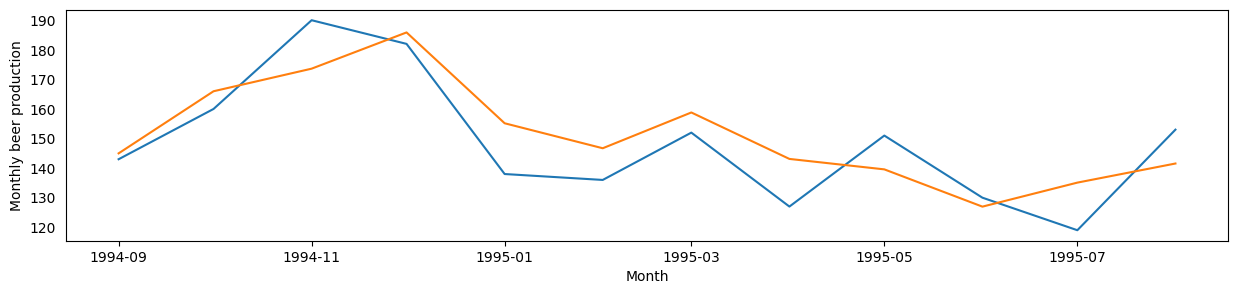

In [117]:
import seaborn as sns

plt.figure(figsize=(15,3))
ax = sns.lineplot(x= test.index, y=test["Monthly beer production"])
sns.lineplot(x=test.index, y = predictions["Prophet_PRED"]);

In [119]:
prophet_rmse_error = rmse(test['Monthly beer production'], predictions["Prophet_PRED"])
prophet_mse_error = prophet_rmse_error**2
mean_value = data['Monthly beer production'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 130.64993559044183
RMSE Error: 11.430220277424308
Mean: 136.3953781512605


In [122]:
predictions

,Monthly beer production,SARIMA_PRED,LSTM_PRED,Prophet_PRED
Month,,,,
1994-09-01,143.0,134.943789,138.922024,144.988196
1994-10-01,160.0,156.937777,151.329984,165.982946
1994-11-01,190.0,178.643562,169.011484,173.623783
1994-12-01,182.0,181.548452,169.173210,185.872037
1995-01-01,138.0,140.707429,143.251995,155.162301
1995-02-01,136.0,139.402608,139.381410,146.714935
1995-03-01,152.0,147.740310,148.745725,158.810040
1995-04-01,127.0,132.785899,126.824806,143.105282
1995-05-01,151.0,136.671865,127.303644,139.574394


In [126]:
# Karşılaştırma

rmse_errors = [sarima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [sarima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["SARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

In [132]:
errors

,Models,RMSE Errors,MSE Errors
0,SARIMA,8.726002,76.143110
1,LSTM,12.066950,145.611290
2,Prophet,11.430220,130.649936


In [131]:
predictions

,Monthly beer production,SARIMA_PRED,LSTM_PRED,Prophet_PRED
Month,,,,
1994-09-01,143.0,134.943789,138.922024,144.988196
1994-10-01,160.0,156.937777,151.329984,165.982946
1994-11-01,190.0,178.643562,169.011484,173.623783
1994-12-01,182.0,181.548452,169.173210,185.872037
1995-01-01,138.0,140.707429,143.251995,155.162301
1995-02-01,136.0,139.402608,139.381410,146.714935
1995-03-01,152.0,147.740310,148.745725,158.810040
1995-04-01,127.0,132.785899,126.824806,143.105282
1995-05-01,151.0,136.671865,127.303644,139.574394
